#### Modelling using Resnet18

In [1]:
from src.cv.pytorch.datasets.facial_keypoint_detection.dataset import FacialKeypointDataset
from src.cv.model_pipelines.facial_keypoint_resnet_pipeline import FacialResnetTrainingPipeline

In [2]:
fkd = FacialKeypointDataset(
    dataset_name="faces", 
    data_type = "csv",
    data_file=r"data/facial-keypoints-detection/training.csv",
    resize_size=96,
    is_test=False
)

In [3]:
model_training_config = dict(
    learning_rate=0.09,
    batch_size=250,
    epochs=20,
    batch_norm_momentum=0.5
)
model_data_config = dict(
     dataset_size=len(fkd), train_data_pct=0.8, model_save_path="C:\\Users\\sankr\\Documents\\projects\\git_work\\experiments_cv_nlp\\data\\facial-keypoint-detection"
)

In [4]:
from src.cv.pytorch.models.resnet_model_architectures import RESNET_MODEL_ARCHITECTURES

In [5]:

model_initialization_params=dict(
    batch_norm_epsilon=1e-05, 
    batch_norm_momentum=model_training_config["batch_norm_momentum"],
    in_channels=1,
    num_classes=30,
    use_leaky_relu_in_resnet = True,
    alpha_leaky_relu = 0.01,
    initialize_cnn=True,
    resnet_stride_output_combination= RESNET_MODEL_ARCHITECTURES["resnet18"],
)

In [6]:
facial_keypoint_pipeline = FacialResnetTrainingPipeline(
    dataset=fkd,
    model_data_config=model_data_config,
    model_initialization_params=model_initialization_params,
    model_training_config = model_training_config,
)

In [7]:
print(facial_keypoint_pipeline.model)

VanillaResnet(
  (maxPool2d1): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (BasicBlock_conv2x_1): ResnetBasicBlock(
    (conv1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.001)
    )
    (conv2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (BasicBlock_conv2x_2): ResnetBasicBlock(
    (conv1): Sequential(
      (0): Con

In [ ]:
facial_keypoint_pipeline.train()


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

root - INFO - Train Loss for epoch 0: 345.8819 - 08-Feb-23 13:55:44
root - INFO - Validation Loss for epoch 0: 198495.6781 - 08-Feb-23 13:56:04


  5%|████▏                                                                              | 1/20 [00:47<15:10, 47.93s/it]

root - INFO - Train Loss for epoch 1: 23.9061 - 08-Feb-23 13:56:26
root - INFO - Validation Loss for epoch 1: 58.6419 - 08-Feb-23 13:56:47


 10%|████████▎                                                                          | 2/20 [01:30<13:30, 45.01s/it]

root - INFO - Train Loss for epoch 2: 15.2385 - 08-Feb-23 13:57:09


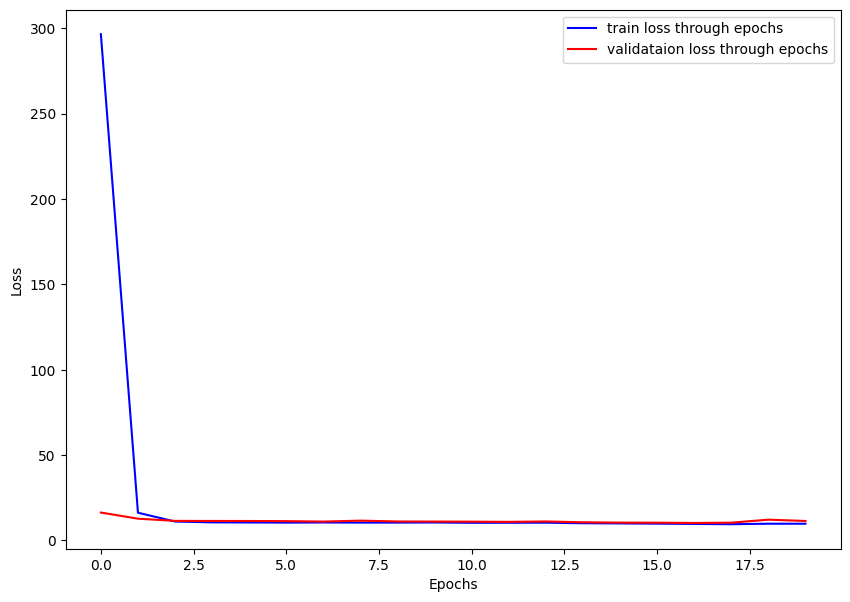

In [8]:
facial_keypoint_pipeline.generate_train_validation_loss_curves()

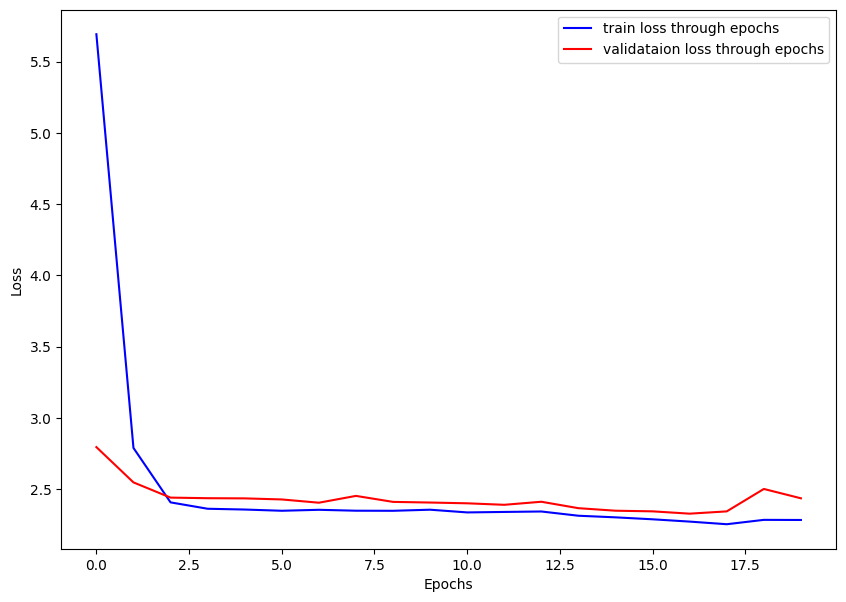

In [16]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(np.log(facial_keypoint_pipeline.train_loss), color='blue', label='train loss through epochs')
plt.plot(np.log(facial_keypoint_pipeline.validation_loss), color='red', label='validataion loss through epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
facial_keypoint_pipeline.best_model

Resnet(
  (maxPool2d1): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2d1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (Resnet_18conv2Block): ResnetBlock(
    (BasicBlock2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
    )
  )
  (Resnet_18conv3Block): ResnetBlock(
    (downsample): Sequential(
      (0): Conv2d(64, 128,

#### Further work on Kaggle -> https://www.kaggle.com/code/sunnyjoshi1401/facial-keypoint-detection-resnet18